> 📖 **Literatura:** Pentru intelegerea notiunii de Procesare a Limbajului Natural (Natural Language Processing - NLP) si a diferitor probleme a acestuia se va citi articolul [*A Simple Introduction to Natural Language Processing*](https://becominghuman.ai/a-simple-introduction-to-natural-language-processing-ea66a1747b32).

# Descarcarea si vizualizarea datelor

## Descarcarea datelor

In [1]:
# Verifica conexiunii la GPU
!nvidia-smi -L

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [2]:
# descarcarea functiilor ajutatoare
!wget https://raw.githubusercontent.com/npsimid/Bazele_tensorflow/main/Functii_ajutatoare.py

--2021-11-30 12:57:00--  https://raw.githubusercontent.com/npsimid/Bazele_tensorflow/main/Functii_ajutatoare.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11829 (12K) [text/plain]
Saving to: ‘Functii_ajutatoare.py’

Functii_ajutatoare. 100%[===================>]  11.55K  --.-KB/s    in 0s      

2021-11-30 12:57:00 (98.5 MB/s) - ‘Functii_ajutatoare.py’ saved [11829/11829]



In [3]:
#Importul functiilor din modul
from Functii_ajutatoare import create_tensorboard_callback, plot_loss_curves, unzip_data, compare_historys

In [4]:
# descarcarea setului de date textuale
!wget "https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip"


--2021-11-30 12:57:03--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.128, 2607:f8b0:4023:c0b::80, 2607:f8b0:4023:c03::80
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.02s   

2021-11-30 12:57:03 (29.8 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



In [5]:
# Dezarhivarea setului de date
unzip_data("nlp_getting_started.zip")

## Vizualizarea setului de date descarcat

In [6]:
# Conversia datelor .csv in pandas dataframe
import pandas as pd
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [7]:
# vizualizarea datelor de training in pd
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [8]:
# vizualizarea datelor de test in pd
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [9]:
# amestecarea datelor de training
train_df_shuffled = train_df.sample(frac=1, random_state=9)
train_df_shuffled

,id,keyword,location,text,target
4006,5689,floods,Philippines,PAGASA 7:12am: YELLOW warning - Panay Island G...,1
2574,3691,destroy,NaN,Save your riches in heaven where they will nev...,0
1345,1943,burning%20buildings,"New Orleans ,Louisiana",Burning buildings? Media outrage? http://t.co/...,1
4526,6434,hurricane,NaN,Ashley and I on going to hurricane harbor Frid...,1
2295,3292,demolish,NaN,I have completed the quest 'Demolish 5 Murlo.....,0
...,...,...,...,...,...
6200,8850,smoke,NaN,And all you girls that smoke.... have you noti...,0
501,726,attacked,"Los Angeles, CA",@envw98 @NickCoCoFree @JulieDiCaro @jdabe80 Wh...,0
6782,9716,tragedy,NaN,Rly tragedy in MP: Some live to recount horror...,1
4444,6325,hostage,NaN,I went to pick up my lunch today and the barte...,1


In [10]:
# verificarea numarului elementelor in fiecare clasa in coloana target
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [11]:
# Verificare numarului de elemente in setul de training
len(train_df)

7613

In [12]:
# verificarea numarului de elemente in setul de test 
len(test_df)

3263

In [13]:
# vizualziarea unor date random
import random
random_index = random.randint(0, len(train_df)-5)
for row in train_df_shuffled[["text", "target"]][random_index: random_index+5].itertuples(index = False):
  text, target = row
  print(f"Textul este: \n {text}\n")
  print("Concluzia este: ", "Dezastru\n\n -----------" if target ==1 else "Ne dezastru\n\n -----------")



Textul este: 
 Russian 'food crematoria' provoke outrage amid crisis famine memories http://t.co/h6Z7hXUqtu via @YahooNews

Concluzia este:  Dezastru

 -----------
Textul este: 
 @POTUS you until you drown by water entering the lungs. You being alive has caused this great country to fall to shit because you're a pussy

Concluzia este:  Ne dezastru

 -----------
Textul este: 
 RT @tonyhsieh: 'The person who dances with you in the rain will most likely walk with you in the storm.' -Anonymous

Concluzia este:  Ne dezastru

 -----------
Textul este: 
 Delmont's 'Onion House' Purchased After Plans For Demolition http://t.co/yojKfQeJ6s

Concluzia este:  Dezastru

 -----------
Textul este: 
 Detonation into the realistic assets entering india: koZ http://t.co/9ZRQMd8nGZ

Concluzia este:  Ne dezastru

 -----------


# Procesarea datelor

## Divizarea in subseturi de training si validate

In [14]:
# formarea subsetulilor de training si de validare
from sklearn.model_selection import train_test_split
train_sentences, val_sentences, train_label, val_label = train_test_split(train_df_shuffled["text"].to_numpy(),
                                                                          train_df_shuffled['target'].to_numpy(),
                                                                          test_size = 0.1,
                                                                          random_state = 9)

In [15]:
# verificarea lungimilor subseturilor
len(train_sentences), len(val_sentences), len(train_label), len(val_label)

(6851, 762, 6851, 762)

In [16]:
# vizualizarea a primelor 5 date de training si a concluziilor lor
train_sentences[:5], train_label[:5]

(array(["@BookTubeAThon A world in which people aren't dying from natural and supernatural disaster and war most likely.",
        'One thing you can be sure of. There will never be bush fires in Scotland as the ground is always soaking wet????',
        "Mortal Kombat X is an excellent fatalities and the most fun I\x89Ûªve ever had with a mortal kombat SEGA's version http://t.co/fLO8fgy35A",
        "'Cause you play me like a symphony play me till your fingers bleed. I'm your greatest masterpiece. You ruin me??",
        '2pcs 18W CREE Led Work Light  Offroad Lamp Car Truck Boat Mining 4WD FLOOD BEAM - Full rea\x89Û_ http://t.co/VDeFmulx43 http://t.co/yqpAIjSa5g'],
       dtype=object), array([0, 0, 0, 0, 0]))

## Conversia textului in numere

### Vectorizarea textului (Token-izarea)

Vectorizarea textului presupune conversia cuvintelor (caracterelor sau a subcuvintelor) in valori numerice.

In [17]:
# importul nivelului de vectorizare
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

In [18]:
# Setarea nivelului de vectorizare a textului cu parametri impliciti
text_vectorizer = TextVectorization(max_tokens=None, # volumul maxim al vocabularului, None = toate cuvintele
                                   standardize = "lower_and_strip_punctuation", # toate litere devin mici si se sterg semnele de punctuatie
                                   split="whitespace", # textul se divizeaza dupa spatiile goale formanduse token-urile
                                   ngrams = None, # sa se formaze grupe din token-uri?
                                   output_mode = "int", # cu vor fi reprezentate token-urile la iesire
                                   output_sequence_length = None) # cat de lunga va fi secventa de iesire pentru text



In [19]:
# determinarea numarului mediu de cuvinte intr-n text din subsetul de training
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

15

In [20]:
# Setarea unui numar maxim de cuvinte in vocabular
MAX_VOCAB_LENGTH = 10000

In [21]:
# Setarea numarului maxim de token-uri intr-un text
MAX_LENGTH = 15

In [22]:
# crearea nivelului de vectorializara a textului cu unii parametri personalizati
text_vectorizer = TextVectorization(max_tokens=MAX_VOCAB_LENGTH,
                                    output_mode="int",
                                    output_sequence_length = MAX_LENGTH)

In [23]:
# aplicarea nivelului de vectorializare asupra setului de training
text_vectorizer.adapt(train_sentences)

In [24]:
# crearea unui text (in engleza deoarece setul de training este in engleza) si vectorizarea lui
sample_sentence = "It's ranning and there's a flood in my street"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[ 37,   1,   7, 284,   3, 203,   4,  13, 735,   0,   0,   0,   0,
          0,   0]])>

In [25]:
# vectorizarea unei secvente aliatoare din setul de training
random_sentence = random.choice(train_sentences)
print(f"Textul original: \n {random_sentence}\n\nTextul vectorizat: \n {text_vectorizer([random_sentence])}")

Textul original: 
 People who say it cannot be done should not interrupt those who are doing it. ÛÒ George Bernard Shaw

Textul vectorizat: 
 [[  57   65  125   16 1684   22  655  159   34    1  167   65   21  550
    16]]


In [26]:
# selectarea cuvintelor unice din vocabular
word_in_vocab = text_vectorizer.get_vocabulary()
# vizualizarea primelor 5 cele mai des intilnite
word_in_vocab[:5]

['', '[UNK]', 'the', 'a', 'in']

In [27]:
# vizualizarea ultimelor 5 cele mai rara intalnite
word_in_vocab[-5:]

['padded', 'pada', 'pact', 'pacquiao', 'packåÊfor']

### Incorporarea vectorilor textului (Embedding)

Incorporarea vectorilor textului presupune conversia numarului obtinut dupa vectorizarea cuvantului intr-o matrice liniara de numere ce pot fi modificate procesul de training. Valorile numerelor din matrice sunt determinate de unele partcularitati (caracteristici) selectate de catre program (caracteristici necunscute omului). Acest lucru va permite crearea unei distante mai mici intre cuvintele care se aseamana (ca sens) fata de cuvintele ce se deosebesc

In [28]:
# importul modulului si fixarea random_seed
tf.random.set_seed(9)
from tensorflow.keras import layers

# crearea nivelului de incorporare
embedding = layers.Embedding(input_dim=MAX_VOCAB_LENGTH, #Setarea formei de intrare adica a numarului maxim al vocabularului
                             output_dim = 128, # setarea marimii vectorului incorporat (numaraul de  cparticularitati ce vor permite formarea matricii unui token)
                             embeddings_initializer = "uniform", # valorile initiale ale vectorului vor fi luate random uniform
                             input_length = MAX_LENGTH, # cate token-uri are un text
                             name = "embedding_1")

In [29]:
# incorporarea vectorului unei secvente aliataore din setul de training
random_sentence = random.choice(train_sentences)
vector_sentence = text_vectorizer([random_sentence])
embendding_sentence = embedding(vector_sentence)
print(f"Textul original:\n{random_sentence}\n\nTextul vectorizat:\n{vector_sentence}\n\nTextul incorporat:\n{embendding_sentence}")

Textul original:
Do you want to play a game?
http://t.co/sQFp6Ecz0i
Its a GoogleMaps mashup that calculates the effects of the detonation of nuclear bomb

Textul vectorizat:
[[ 69  12 142   5 711   3 489   1  37   3   1   1  14   1   2]]

Textul incorporat:
[[[-0.01316906  0.03281775 -0.04289088 ...  0.00987341  0.02306885
   -0.00779009]
  [ 0.03438935  0.03334531  0.02313003 ... -0.03237385  0.0087736
    0.04805675]
  [-0.01536921  0.00380259 -0.02473805 ...  0.01578787  0.02395269
    0.0268367 ]
  ...
  [ 0.0195768  -0.03020085  0.04551674 ... -0.04808092  0.00638624
    0.02982808]
  [-0.0051067  -0.00821059 -0.04455356 ...  0.01485716 -0.02903038
   -0.03782022]
  [ 0.03725643 -0.00802173 -0.04651486 ... -0.01617235  0.03278587
   -0.03733534]]]


In [30]:
#vizualizarea vectorului primului token
embendding_sentence[0][0]

<tf.Tensor: shape=(128,), dtype=float32, numpy=
array([-0.01316906,  0.03281775, -0.04289088, -0.00381529,  0.00910157,
        0.00329113,  0.02488525, -0.00211407,  0.04382892,  0.00909979,
        0.02909329, -0.03360156, -0.02367489,  0.04628595,  0.039152  ,
        0.02269827,  0.01849065,  0.03309839, -0.00724759,  0.01659543,
       -0.02883192,  0.01040852, -0.03324995,  0.03122271,  0.00324244,
       -0.02141684,  0.03821968,  0.0211021 , -0.00398814, -0.04806072,
       -0.01342518,  0.03785838, -0.00568992,  0.03980216, -0.02389965,
        0.03074639,  0.04106977,  0.01110644,  0.03272534, -0.00481455,
        0.04338102,  0.02889838,  0.03209342,  0.03458886, -0.03144218,
       -0.01094157,  0.0227061 , -0.00729841,  0.02185985, -0.01768017,
        0.00803332,  0.03412658,  0.03855962, -0.03863751, -0.00284516,
        0.01025925,  0.02159003, -0.02176917, -0.02510213,  0.04934469,
        0.03442106, -0.01400267,  0.00820556,  0.0326202 ,  0.03419805,
       -0.014702

# Modelul 0 baseline - Naive Bayes

Primul model elaborat v-a fi intotdeauna un model machine learning si sta deoarece acesta este c el mai simplu si cel mai rapid de elaborat.

Pentru laborarea modelului 0 se va utiliza algoritmul [ Multinomial Naive Bayes algorithm](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB) selectat [harta Scikit-Learn in mashine learning](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)

In [31]:
# Importul modulelor
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [32]:
# crearea modelului utilizand Pipeline
model_0 = Pipeline([
                    ("tfidf", TfidfVectorizer()), #conversia cuvintelor in numere utilizand tfidf
                    ("clf", MultinomialNB()) # modelul textual
])

In [33]:
#Invatarea modelului
model_0.fit(train_sentences,train_label)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [34]:
# Evaluarea modelului 
baseline_score = model_0.score(val_sentences, val_label)
baseline_score

0.7913385826771654

In [35]:
# realizarea predictiei
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:10]

array([1, 0, 0, 0, 1, 1, 0, 0, 0, 0])

In [36]:
val_label[:10]

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 1])

Pentru obtinerea tuturor datelor de evaluarea a modelelor se va elabora o functie care se va aplica de fiecare data 

In [37]:
#importul modelului
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# crearae unei functii de determinarea a acuratetei, preciziei, sensibilitatii si f1 - score
def calculate_results(y_true, y_pred):
  model_accuracy = accuracy_score(y_true, y_pred)
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                   "precision": model_precision,
                   "recall": model_recall,
                   "f1": model_f1}
  return model_results



In [38]:
# evaluarea modelului cu functia creata
baseline_results = calculate_results(val_label, baseline_preds)
baseline_results

{'accuracy': 0.7913385826771654,
 'f1': 0.7825976068853863,
 'precision': 0.8069436699758639,
 'recall': 0.7913385826771654}

# Modelul 1 Dense_layer

In [39]:
# Importul functiei de crearea a callback TensoBoard
from Functii_ajutatoare import create_tensorboard_callback

In [40]:
# Setarea directoriului de salvare a inregistrarilor callback TensorBoard
SAVE_DIR = "model_logs"

In [41]:
# construirea modelului utilizand Functional API
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string") # intrarile sunt stringuri unidimensionale
x = text_vectorizer(inputs) 
x = embedding(x) 
x = layers.GlobalAveragePooling1D()(x) # transforma vectorul textului dupa incorporare (15 valori) intr-un singur numar (valoarea medie)
outputs = layers.Dense(1, activation="sigmoid")(x) 
model_1 = tf.keras.Model(inputs, outputs, name="model_1_dense")

In [42]:
# vizualizarea structurii modelului model_1
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_1 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [43]:
# Compilarea modelului model_1
model_1.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [44]:
# Invatarea modelului
model_1_history = model_1.fit(train_sentences,
                              train_label,
                              epochs = 5,
                              validation_data = (val_sentences, val_label),
                              callbacks = [create_tensorboard_callback(SAVE_DIR,"simple_dense_model")])

Se salveaza datele inregistrate in directoriul: model_logs/simple_dense_model/20211130-125705
Epoch 1/5
215/215 [==============================] - 4s 13ms/step - loss: 0.6103 - accuracy: 0.6958 - val_loss: 0.5429 - val_accuracy: 0.7244
Epoch 2/5
215/215 [==============================] - 3s 12ms/step - loss: 0.4384 - accuracy: 0.8221 - val_loss: 0.4954 - val_accuracy: 0.7612
Epoch 3/5
215/215 [==============================] - 3s 12ms/step - loss: 0.3444 - accuracy: 0.8632 - val_loss: 0.4944 - val_accuracy: 0.7690
Epoch 4/5
215/215 [==============================] - 3s 13ms/step - loss: 0.2813 - accuracy: 0.8930 - val_loss: 0.5109 - val_accuracy: 0.7677
Epoch 5/5
215/215 [==============================] - 3s 13ms/step - loss: 0.2335 - accuracy: 0.9132 - val_loss: 0.5441 - val_accuracy: 0.7717


In [45]:
# evaluarea modelului
model_1.evaluate(val_sentences,val_label)

24/24 [==============================] - 0s 2ms/step - loss: 0.5441 - accuracy: 0.7717


[0.5440540313720703, 0.7716535329818726]

In [46]:
# relizarea predictiei pe setul de validare
model_1_pred_probs = model_1.predict(val_sentences)

In [47]:
# vizualizarea primelor 10 predictii
model_1_pred_probs[:10]

array([[0.49328464],
       [0.08307859],
       [0.13208139],
       [0.02029154],
       [0.8003291 ],
       [0.8976219 ],
       [0.08025321],
       [0.01379699],
       [0.17960116],
       [0.0456357 ]], dtype=float32)

In [48]:
# vizualizarea formei predictie
model_1_pred_probs.shape 

(762, 1)

In [49]:
# vizualizarea predictiei asupra primului text din setul de validare
model_1_pred_probs[0]

array([0.49328464], dtype=float32)

In [50]:
# conversia probabilitatilor de predictie in clase de prdictie (0 sau 1)
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs))

In [51]:
# vizualziarea primelor 10 clase prezise
model_1_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 0., 1., 1., 0., 0., 0., 0.], dtype=float32)>

In [52]:
# calcularea rezultatelor modului 1
model_1_results = calculate_results(val_label, model_1_preds)
model_1_results

{'accuracy': 0.7716535433070866,
 'f1': 0.7689641590374878,
 'precision': 0.7711551348634611,
 'recall': 0.7716535433070866}

# Modelul 2 LSTM

> 📖 **Literatura:**
> * [MIT Deep Learning Lecture on Recurrent Neural Networks](https://youtu.be/SEnXr6v2ifU).
> * [The Unreasonable Effectiveness of Recurrent Neural Networks](http://karpathy.github.io/2015/05/21/rnn-effectiveness/) de Andrej Karpathy.
> * [Understanding LSTMs](https://colah.github.io/posts/2015-08-Understanding-LSTMs/) de Chris Olah .


Pentru elaborarea nivelului (celulei) LSTM in TensorFlow se utilizeaza [`tensorflow.keras.layers.LSTM()`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM). 

In [53]:
# crearea unui nou model de incorporare (embedding) deoaree cel precedent deja a invatat si stfel nu vom putea compara rezultatele modelelor
tf.random.set_seed(9)
from tensorflow.keras import layers
model_2_embedding = layers.Embedding(input_dim=MAX_VOCAB_LENGTH,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length = MAX_LENGTH,
                                     name="embedding_2")

# crearea modelului LSTM
inputs=layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_2_embedding(x)
x= layers.LSTM(64) (x) # setarea numarului de nivele ascunse (daca se utilizeza 2 nivele lstm atunci primu trebuie sa aiba setat si paramatrul return_sequences =True)
outputs=layers.Dense(1,activation="sigmoid") (x)
model_2 = tf.keras.Model(inputs, outputs, name="model_2_LSTM")

# Compilarea modelului
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [54]:
# vizualizara structurii
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_2 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,329,473
Trainable params: 1,329,473
Non-trainable params: 0
____________________________________________

> 📖 **Literatura:**
> * [Stack Overflow answer to calculate the number of parameters in an LSTM cell](https://stackoverflow.com/questions/38080035/how-to-calculate-the-number-of-parameters-of-an-lstm-network) de Marcin Możejko
> * [Calculating number of parameters in a LSTM unit and layer](https://medium.com/@priyadarshi.cse/calculating-number-of-parameters-in-a-lstm-unit-layer-7e491978e1e4) de Shridhar Priyadarshi

In [55]:
# Invatarea modelului
model_2_history = model_2.fit(train_sentences,
                              train_label,
                              epochs=5,
                              validation_data = (val_sentences, val_label),
                              callbacks = [create_tensorboard_callback(SAVE_DIR, "LSTM")])

Se salveaza datele inregistrate in directoriul: model_logs/LSTM/20211130-125726
Epoch 1/5
215/215 [==============================] - 8s 25ms/step - loss: 0.5079 - accuracy: 0.7451 - val_loss: 0.4754 - val_accuracy: 0.7782
Epoch 2/5
215/215 [==============================] - 5s 22ms/step - loss: 0.3070 - accuracy: 0.8718 - val_loss: 0.6304 - val_accuracy: 0.7651
Epoch 3/5
215/215 [==============================] - 5s 23ms/step - loss: 0.2074 - accuracy: 0.9235 - val_loss: 0.6859 - val_accuracy: 0.7336
Epoch 4/5
215/215 [==============================] - 5s 23ms/step - loss: 0.1458 - accuracy: 0.9466 - val_loss: 0.8218 - val_accuracy: 0.7533
Epoch 5/5
215/215 [==============================] - 5s 23ms/step - loss: 0.1003 - accuracy: 0.9620 - val_loss: 1.0079 - val_accuracy: 0.7454


In [56]:
#evaluarea modelului
model_2.evaluate(val_sentences, val_label)

24/24 [==============================] - 0s 4ms/step - loss: 1.0079 - accuracy: 0.7454


[1.0078637599945068, 0.7454068064689636]

In [57]:
# realizarea predictiei
model_2_pred_probs = model_2.predict(val_sentences)

In [58]:
#vizualizarea primelor 10 predictii
model_2_pred_probs[:10]

array([[7.9109371e-03],
       [8.9327693e-03],
       [4.4401884e-03],
       [3.1927228e-04],
       [8.4630513e-01],
       [9.8911190e-01],
       [1.9377768e-03],
       [8.2200766e-04],
       [8.4245205e-03],
       [4.2796135e-04]], dtype=float32)

In [59]:
# vizualizarea formei predictie
model_2_pred_probs.shape 

(762, 1)

In [60]:
# conversia probabilitatilor de predictie in clase de prdictie (0 sau 1)
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))

In [61]:
# vizualziarea primelor 10 clase prezise
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 0., 1., 1., 0., 0., 0., 0.], dtype=float32)>

In [62]:
# calcularea rezultatelor modului 2
model_2_results = calculate_results(val_label, model_2_preds)
model_2_results

{'accuracy': 0.7454068241469817,
 'f1': 0.7410139770401337,
 'precision': 0.7450815354830299,
 'recall': 0.7454068241469817}

# Modelul 3 GRU

> 📖 **Literatura:** 
* Pagina Wikipedia [Gated Recurrent Unit](https://en.wikipedia.org/wiki/Gated_recurrent_unit) 
* [Understanding GRU networks](https://towardsdatascience.com/understanding-gru-networks-2ef37df6c9be) de Simeon Kostadinov

Pentru elaborarea nivelului (celulei) GRU in TensorFlow se utilizeaza [`tensorflow.keras.layers.GRU()`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/GRU).

In [63]:
# crearea unui nou model de incorporare
tf.random.set_seed(9)
from tensorflow.keras import layers
model_3_embedding = layers.Embedding(input_dim=MAX_VOCAB_LENGTH,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=MAX_LENGTH,
                                     name = "embedding_3")

# crearea modelului GRU
inputs = layers.Input(shape=(1,), dtype="string",)
x= text_vectorizer(inputs)
x= model_3_embedding(x)
x = layers.GRU(64)(x) # setarea numarului de nivele ascunse (daca se utilizeza 2 nivele lstm atunci primu trebuie sa aiba setat si paramatrul return_sequences =True)
outputs=layers.Dense(1, activation="sigmoid")(x)
model_3 = tf.keras.Model(inputs, outputs, name="model_3_GRU")

In [64]:
# compilarea model_3
model_3.compile(loss="binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [65]:
# vizualizarea structurii modelului
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_3 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,317,313
Trainable params: 1,317,313
Non-trainable params: 0
_____________________________________________

In [66]:
# invatarea modelului
model_3_history = model_3.fit(train_sentences,
                              train_label,
                              epochs= 5,
                              validation_data =(val_sentences, val_label),
                              callbacks = [create_tensorboard_callback(SAVE_DIR, "GRU")])

Se salveaza datele inregistrate in directoriul: model_logs/GRU/20211130-125811
Epoch 1/5
215/215 [==============================] - 7s 25ms/step - loss: 0.5243 - accuracy: 0.7310 - val_loss: 0.4748 - val_accuracy: 0.7808
Epoch 2/5
215/215 [==============================] - 5s 23ms/step - loss: 0.3095 - accuracy: 0.8702 - val_loss: 0.6167 - val_accuracy: 0.7612
Epoch 3/5
215/215 [==============================] - 5s 23ms/step - loss: 0.2095 - accuracy: 0.9206 - val_loss: 0.6766 - val_accuracy: 0.7178
Epoch 4/5
215/215 [==============================] - 5s 23ms/step - loss: 0.1459 - accuracy: 0.9479 - val_loss: 0.7471 - val_accuracy: 0.7454
Epoch 5/5
215/215 [==============================] - 5s 23ms/step - loss: 0.1078 - accuracy: 0.9632 - val_loss: 0.7486 - val_accuracy: 0.7467


In [67]:
# evaluarea modelului
model_3. evaluate(val_sentences,val_label)

24/24 [==============================] - 0s 4ms/step - loss: 0.7486 - accuracy: 0.7467


[0.7486165165901184, 0.7467191815376282]

In [68]:
# realizarea predictiei
model_3_pred_probs = model_3.predict(val_sentences)

In [69]:
# vizualizarea primelor 10 predictii
model_3_pred_probs[:10]

array([[0.06749803],
       [0.03008005],
       [0.02429491],
       [0.00353703],
       [0.8729618 ],
       [0.9918598 ],
       [0.02083474],
       [0.01879066],
       [0.30458406],
       [0.0150038 ]], dtype=float32)

In [70]:
# vizualziarea formei predictiilor
model_3_pred_probs.shape

(762, 1)

In [71]:
# conversia probabilitatilor de predictie in clase de prdictie (0 sau 1)
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))

In [72]:
# vizualziarea primelor 10 clase prezise
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 0., 1., 1., 0., 0., 0., 0.], dtype=float32)>

In [73]:
# calcularea rezultatelor modului 3
model_3_results = calculate_results(val_label,model_3_preds)
model_3_results

{'accuracy': 0.7467191601049868,
 'f1': 0.7445213274928415,
 'precision': 0.7452034547293646,
 'recall': 0.7467191601049868}

# Modelul 4 RNN_bidirectional

RNN birectionale sunt retele RNN (LSTM sau GRU) in care secenta se citeste atat de la stanga la dreapta cat si de la dreapta la stanga. Acest lucru este necesar atunci cand de exemplu prezicerea unui anumit cuvand depinde nu doar de cuvintele anterioare dar si de cuvintele posterioare.
RNN biderctionale datorita acestei duble treceri prin secventa, va avea un numar dublu de parametri si respectiv un timp dublu de training.

Pentru elaborarea nivelului (celulei) bidirectional in TensorFlow se utilizeaza [`tensorflow.keras.layers.Bidirectional`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Bidirectional) care primeste drept parametru un nivel RNN unidirectional (LSTM sau GRU)

In [74]:
# crearea nivelului de incorporare
tf.random.set_seed(9)
from tensorflow.keras import layers
model_4_embeddings = layers.Embedding(input_dim=MAX_VOCAB_LENGTH,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=MAX_LENGTH,
                                     name ="embedding_4")

# crearae modelului 4
inputs = layers.Input(shape=(1,), dtype="string")
x= text_vectorizer(inputs)
x=model_4_embeddings(x)
x= layers.Bidirectional(layers.LSTM(64))(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_4 = tf.keras.Model(inputs, outputs, name="model_4_bidirectional")

In [75]:
# compilarea modelului
model_4.compile(loss="binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [76]:
# vizualizarea structurii modelului
model_4.summary()

Model: "model_4_bidirectional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_4 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              98816     
 l)                                                              
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,378,945
Trainable params: 1,3

In [77]:
# invararea modelului 4
model_4_history = model_4.fit(train_sentences,
                              train_label,
                              epochs =5,
                              validation_data=(val_sentences, val_label),
                              callbacks = [create_tensorboard_callback(SAVE_DIR, "bidirectional")])

Se salveaza datele inregistrate in directoriul: model_logs/bidirectional/20211130-125839
Epoch 1/5
215/215 [==============================] - 11s 36ms/step - loss: 0.5061 - accuracy: 0.7441 - val_loss: 0.4769 - val_accuracy: 0.7782
Epoch 2/5
215/215 [==============================] - 7s 31ms/step - loss: 0.3020 - accuracy: 0.8733 - val_loss: 0.6153 - val_accuracy: 0.7690
Epoch 3/5
215/215 [==============================] - 7s 32ms/step - loss: 0.2002 - accuracy: 0.9256 - val_loss: 0.6711 - val_accuracy: 0.7270
Epoch 4/5
215/215 [==============================] - 7s 31ms/step - loss: 0.1294 - accuracy: 0.9553 - val_loss: 0.8088 - val_accuracy: 0.7349
Epoch 5/5
215/215 [==============================] - 7s 31ms/step - loss: 0.0886 - accuracy: 0.9688 - val_loss: 0.8861 - val_accuracy: 0.7415


In [78]:
# evaluarea modelului
model_4.evaluate(val_sentences,val_label)

24/24 [==============================] - 0s 6ms/step - loss: 0.8861 - accuracy: 0.7415


[0.8860554695129395, 0.7414698004722595]

In [79]:
# realizarea predictiei
model_4_pred_probs = model_4.predict(val_sentences)

In [80]:
#vizualizarea primelor 10 predictii
model_4_pred_probs[:10]

array([[1.5714395e-01],
       [5.7291985e-03],
       [4.4777095e-03],
       [9.7829103e-04],
       [9.2684841e-01],
       [9.9036050e-01],
       [1.6933471e-02],
       [1.3934672e-03],
       [2.3537064e-01],
       [7.3449314e-03]], dtype=float32)

In [81]:
# vizualizarea formei predictiilor
model_4_pred_probs.shape

(762, 1)

In [82]:
# conversia probabilitatilor de predictie in clase de prdictie (0 sau 1)
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))

In [83]:
# vizualziarea primelor 10 clase prezise
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 0., 1., 1., 0., 0., 0., 0.], dtype=float32)>

In [84]:
# calcularea rezultatelor modului 4
model_4_results = calculate_results(val_label, model_4_preds)
model_4_results

{'accuracy': 0.7414698162729659,
 'f1': 0.7404480521396023,
 'precision': 0.7401759696099124,
 'recall': 0.7414698162729659}

# Modelul 5 Convolutional_1D

Retelele neuronale convolutionale se utilizeaza in domeniul computer vision dar pot fi utilizarte si in procesarea limbajului natural (NLP) considerandu-se secventa ca o imagine unidimensionala

In acest caz in locul nivelor RNN (LSTM sau GRU) se utilizeaza nivele Conv1D ([`tensorflow.keras.layers.Conv1D()`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv1D)) urmate de nivele maxpooling1D ([`tensorflow.keras.layers.GlobablMaxPool1D()`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/GlobalMaxPool1D))

In [85]:
# crearea nivelului de incorporare
tf.random.set_seed(9)
from tensorflow.keras import layers
model_5_embedding = layers.Embedding(input_dim=MAX_VOCAB_LENGTH,
                                     output_dim=128,
                                     input_length=MAX_LENGTH,
                                     name = "embedding_5")

# crearea modelului 5
inputs=layers.Input(shape=(1,), dtype="string")
x= text_vectorizer(inputs)
x=model_5_embedding(x)
x= layers.Conv1D(filters=32, kernel_size=5, activation="relu")(x)
x=layers.GlobalMaxPool1D()(x)
outputs=layers.Dense(1, activation="sigmoid")(x)
model_5=tf.keras.Model(inputs, outputs, name="model_5_Conv1D")

In [86]:
# compilarea modelului
model_5.compile(loss="binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [87]:
# vizualizarea structurii modelului
model_5.summary()

Model: "model_5_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_5 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 conv1d (Conv1D)             (None, 11, 32)            20512     
                                                                 
 global_max_pooling1d (Globa  (None, 32)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense_4 (Dense)             (None, 1)              

In [88]:
# invatarea modelului
model_5_history = model_5.fit(train_sentences,
                              train_label,
                              epochs= 5,
                              validation_data =(val_sentences, val_label),
                              callbacks = [create_tensorboard_callback(SAVE_DIR, "Conv1D")])

Se salveaza datele inregistrate in directoriul: model_logs/Conv1D/20211130-125925
Epoch 1/5
215/215 [==============================] - 4s 16ms/step - loss: 0.5611 - accuracy: 0.7162 - val_loss: 0.4882 - val_accuracy: 0.7756
Epoch 2/5
215/215 [==============================] - 3s 14ms/step - loss: 0.3365 - accuracy: 0.8632 - val_loss: 0.5285 - val_accuracy: 0.7730
Epoch 3/5
215/215 [==============================] - 3s 14ms/step - loss: 0.2065 - accuracy: 0.9263 - val_loss: 0.6318 - val_accuracy: 0.7559
Epoch 4/5
215/215 [==============================] - 3s 14ms/step - loss: 0.1314 - accuracy: 0.9577 - val_loss: 0.7331 - val_accuracy: 0.7651
Epoch 5/5
215/215 [==============================] - 3s 15ms/step - loss: 0.0941 - accuracy: 0.9717 - val_loss: 0.8178 - val_accuracy: 0.7428


In [89]:
# evaluarea modelului
model_5.evaluate(val_sentences, val_label)

24/24 [==============================] - 0s 3ms/step - loss: 0.8178 - accuracy: 0.7428


[0.8178000450134277, 0.7427821755409241]

In [90]:
# realizarea predictiei
model_5_pred_probs = model_5.predict(val_sentences)

In [91]:
# vizualizarea a primelor 10 predictii
model_5_pred_probs[:10]

array([[1.7651305e-01],
       [1.5312135e-03],
       [1.0044396e-02],
       [1.9505152e-01],
       [9.3702078e-01],
       [9.5146394e-01],
       [8.9033604e-02],
       [4.5344234e-04],
       [1.2059301e-01],
       [4.4200122e-03]], dtype=float32)

In [92]:
#viualizarea formei predictiilor
model_5_pred_probs.shape

(762, 1)

In [93]:
# conversia probabilitatilor de predictie in clase de prdictie (0 sau 1)
model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))

In [94]:
# vizualizarea primelor 10 clase prezise
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 0., 1., 1., 0., 0., 0., 0.], dtype=float32)>

In [95]:
# calcularea rezultatelor modului 5
model_5_results = calculate_results(val_label, model_5_preds)
model_5_results

{'accuracy': 0.7427821522309711,
 'f1': 0.7414131252122412,
 'precision': 0.7413061615930314,
 'recall': 0.7427821522309711}

# Modelul 6 Universal_Sentence_Encoder

- In modelele anterioare am treait prorpiul nivel de incorporare insa pentru a aobtine rezultate mai bune se practica utilizarea unui nivel de incorporare deja invatat si acest lucreu se realizeaza prin **transfer learning**.
- In continuare se va utiliza un astefel de nivel numit [Universal Sentence Encoder (USE)](https://www.aclweb.org/anthology/D18-2029.pdf) din [TensorFlow Hub](https://tfhub.dev/google/universal-sentence-encoder/4).
- Universal Sentence Encoder spre deosebire de propriile nivele de incorporare care creau incorporarea la nivel de cuvinte, realizeaza incorporarea la nivel de propozitii. Fiecare prorpzitie este transformata intr-un vector de caracteristici cu 512 valori spre deosebire de propriile nivele de incorporare care transformau fiecare cuvant in vetor cu 128 valori
- Encoder(codorul) relizeaza conversia randului de date , cum ar fi textul, in reprezentare numerica (vetor de caracteristici)
- Decoder (decodorul) realizeaza conversi reprezentarii numerice intr-un tip de date dorit la iesire

In [96]:
# exemplu de descarcare USE utilizand metode hub.load()
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [97]:
# Aplicarea modelului de incorporare descarcat la conversia unei proprozitii in vector de caracteristici
embed_sample = embed(["Afara e furtuna cu vant puternic si inundatii"]) 

In [98]:
# Vizualizarea vectorului de caracteristici a primei (si unicii) proprozitii
embed_sample[0]

<tf.Tensor: shape=(512,), dtype=float32, numpy=
array([ 3.78440358e-02,  3.10632531e-02, -1.11327469e-02, -3.83006030e-04,
       -7.48710521e-03, -7.06134504e-03,  9.67628963e-04, -6.43196777e-02,
        6.94811344e-02, -2.30263248e-02, -8.95643234e-03,  4.13449891e-02,
        5.38329128e-03,  2.77636033e-02, -2.44642869e-02, -4.08061892e-02,
        3.19596939e-02,  2.90827267e-02, -2.27723736e-02, -7.36087700e-03,
        1.56264324e-02, -7.77243003e-02, -1.51022302e-03,  6.97576404e-02,
        2.18028389e-02, -5.80658093e-02,  3.19623612e-02, -9.82919037e-02,
       -9.24721211e-02, -5.85918687e-03, -4.27746214e-02,  1.95979252e-02,
       -3.12839858e-02, -1.43925007e-02,  3.50532867e-03,  4.42879461e-02,
       -4.97590154e-02,  9.03039500e-02, -7.30119199e-02, -3.04233562e-03,
       -2.26779897e-02, -6.39834031e-02,  3.54917208e-03,  3.07293590e-02,
        5.57029955e-02,  2.86886953e-02, -3.86413820e-02,  7.42627233e-02,
        2.11105477e-02, -6.85880035e-02, -2.57113725

In [99]:
# vizualizarea formei vectorului
embed_sample[0].shape

TensorShape([512])

Pentru a transforma modulul USE din TendoFlow Hub in nivel Keras se utilizeaza clasa [`hub.KerasLayer`](https://www.tensorflow.org/hub/api_docs/python/hub/KerasLayer) 

In [100]:
# Utilizarea nivelului USE in locul nivelului de vectorizare si incorporare
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        trainable=False,
                                        input_shape=[],
                                        dtype=tf.string,
                                        name="USE")

In [101]:
# creara modelului 6
from tensorflow.keras import layers
model_6 = tf.keras.Sequential([
                               sentence_encoder_layer,
                               layers.Dense(64, activation="relu"),
                               layers.Dense(1, activation="sigmoid")
                               ], name = "model_6_USE")

In [102]:
# copilarea modelului
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [103]:
# vizualizarea structurii modelului 6
model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_5 (Dense)             (None, 64)                32832     
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [104]:
# invatarea modelului 6
model_6_history = model_6.fit(train_sentences,
                              train_label,
                              epochs=5,
                              validation_data = (val_sentences, val_label),
                              callbacks = [create_tensorboard_callback(SAVE_DIR, "tf_hub_USE")])

Se salveaza datele inregistrate in directoriul: model_logs/tf_hub_USE/20211130-130003
Epoch 1/5
215/215 [==============================] - 5s 12ms/step - loss: 0.5025 - accuracy: 0.7813 - val_loss: 0.4645 - val_accuracy: 0.7664
Epoch 2/5
215/215 [==============================] - 2s 10ms/step - loss: 0.4114 - accuracy: 0.8148 - val_loss: 0.4547 - val_accuracy: 0.7861
Epoch 3/5
215/215 [==============================] - 2s 9ms/step - loss: 0.3978 - accuracy: 0.8208 - val_loss: 0.4554 - val_accuracy: 0.7913
Epoch 4/5
215/215 [==============================] - 2s 9ms/step - loss: 0.3891 - accuracy: 0.8307 - val_loss: 0.4544 - val_accuracy: 0.7887
Epoch 5/5
215/215 [==============================] - 2s 11ms/step - loss: 0.3811 - accuracy: 0.8339 - val_loss: 0.4544 - val_accuracy: 0.7835


In [105]:
# evaluarea modelului
model_6.evaluate(val_sentences,val_label)

24/24 [==============================] - 0s 9ms/step - loss: 0.4544 - accuracy: 0.7835


[0.45443329215049744, 0.7834645509719849]

In [106]:
# realizarea predictiei
model_6_pred_probs = model_6.predict(val_sentences)

In [107]:
# vizualziarea primelor 10 predictii
model_6_pred_probs[:10]

array([[0.9802745 ],
       [0.06928435],
       [0.58241147],
       [0.11063322],
       [0.5375675 ],
       [0.9455412 ],
       [0.19935036],
       [0.18893838],
       [0.07333636],
       [0.08392009]], dtype=float32)

In [108]:
# vizualziarea formei predictiilor
model_6_pred_probs.shape

(762, 1)

In [109]:
# conversia probabilitatilor de predictie in clase de prdictie (0 sau 1)
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))

In [110]:
# vizualizarea primelor 10 clase prezise
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 0., 1., 0., 1., 1., 0., 0., 0., 0.], dtype=float32)>

In [111]:
# calcularea rezultatelor modelui 6
model_6_results = calculate_results(val_label, model_6_preds)
model_6_results

{'accuracy': 0.7834645669291339,
 'f1': 0.7828312799482742,
 'precision': 0.7826621539697618,
 'recall': 0.7834645669291339}

In [112]:
baseline_results

{'accuracy': 0.7913385826771654,
 'f1': 0.7825976068853863,
 'precision': 0.8069436699758639,
 'recall': 0.7913385826771654}

# Modelul 7 USE_10_percent_data 

In cazul utilizarii transfer learning rezultatele pe un set de date mai mic vor fi aproape identice cu cel de pe un set mai mare.
In continuare se va realia un modele identic modelului 6 dar se va realiza invatarea acestuia pe un set de doar 10% din setul initial

In [113]:
# divizarea setului de date de training in 90 si 10 procente
import numpy as np
tain_sentences_90, train_sentences_10, train_label_90, train_label_10 = train_test_split(np.array(train_sentences),
                                                                                         train_label,
                                                                                         test_size=0.1,
                                                                                         random_state=9)

In [114]:
#Vizualziarea lungimii setului total si a setului din 10 procente
len(train_sentences), len(train_sentences_10)

(6851, 686)

In [115]:
# verificare balansarii claselor in setul de 10 procente
pd.Series(train_label_10).value_counts()

0    395
1    291
dtype: int64

Pentru a crea modelul 7 de aceea si structura ca si modelul 6 se va utiliza clonarea acestui cu ajutorul metodei [`tf.keras.models.clone_model()`](https://www.tensorflow.org/api_docs/python/tf/keras/models/clone_model).
Clonare presupune importul doar a structurii nu si a valorilor invatate (ponderilor)

In [116]:
# crearea modelului 7 prin clonare modelului 6 
model_7= tf.keras.models.clone_model(model_6)

In [117]:
# Compilarea modelului 7
model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [118]:
# vizualizarea structurii modelului 7
model_7.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_5 (Dense)             (None, 64)                32832     
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [119]:
# Invatarea modelului 7
model_7_history = model_7.fit(train_sentences_10,
                              train_label_10,
                              epochs=5,
                              validation_data = (val_sentences, val_label),
                              callbacks = [create_tensorboard_callback(SAVE_DIR, "USE_10_percent")])

Se salveaza datele inregistrate in directoriul: model_logs/USE_10_percent/20211130-130022
Epoch 1/5
22/22 [==============================] - 4s 43ms/step - loss: 0.6717 - accuracy: 0.6837 - val_loss: 0.6471 - val_accuracy: 0.7598
Epoch 2/5
22/22 [==============================] - 1s 25ms/step - loss: 0.6017 - accuracy: 0.8149 - val_loss: 0.5900 - val_accuracy: 0.7480
Epoch 3/5
22/22 [==============================] - 0s 17ms/step - loss: 0.5283 - accuracy: 0.8105 - val_loss: 0.5378 - val_accuracy: 0.7507
Epoch 4/5
22/22 [==============================] - 1s 24ms/step - loss: 0.4696 - accuracy: 0.8236 - val_loss: 0.5081 - val_accuracy: 0.7533
Epoch 5/5
22/22 [==============================] - 0s 18ms/step - loss: 0.4287 - accuracy: 0.8265 - val_loss: 0.4944 - val_accuracy: 0.7559


In [120]:
# evaluarea modelului
model_7.evaluate(val_sentences, val_label)

24/24 [==============================] - 0s 8ms/step - loss: 0.4944 - accuracy: 0.7559


[0.4944182336330414, 0.7559055089950562]

In [121]:
# realizarea predictiei
model_7_pred_probs = model_7.predict(val_sentences)

In [122]:
# vizualziarea primelor 10 predictii
model_7_pred_probs[:10]

array([[0.8267729 ],
       [0.0964627 ],
       [0.8112428 ],
       [0.23567307],
       [0.67172486],
       [0.8417094 ],
       [0.39451072],
       [0.3171398 ],
       [0.3043564 ],
       [0.5233492 ]], dtype=float32)

In [123]:
# vizualziarea formei predictiilor
model_7_pred_probs.shape

(762, 1)

In [124]:
# conversia probabilitatilor de predictie in clase de prdictie (0 sau 1)
model_7_preds = tf.squeeze(tf.round(model_7_pred_probs))

In [125]:
# vizualizarea primelor 10 clase prezise
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 0., 1., 0., 1., 1., 0., 0., 0., 1.], dtype=float32)>

In [126]:
# calcularea rezultatelor modelui 7
model_7_results = calculate_results(val_label, model_7_preds)
model_7_results

{'accuracy': 0.7559055118110236,
 'f1': 0.7564294520003181,
 'precision': 0.7573294095280345,
 'recall': 0.7559055118110236}

# Compararea rezultatelor tuturor modelelor

In [127]:
# formarea unui DataFrame cu rezultatele modelelor
all_model_results= pd.DataFrame({"baseline_model": baseline_results,
                                 "dense_model":model_1_results,
                                 "lstm_model": model_2_results,
                                 "gru_model": model_3_results,
                                 "bidirectional_model": model_4_results,
                                 "conv1d_model": model_5_results,
                                 "use_model": model_6_results,
                                 "use_10%_model": model_7_results})

In [128]:
# vizualizarea tabelului
all_model_results

,baseline_model,dense_model,lstm_model,gru_model,bidirectional_model,conv1d_model,use_model,use_10%_model
accuracy,0.791339,0.771654,0.745407,0.746719,0.741470,0.742782,0.783465,0.755906
precision,0.806944,0.771155,0.745082,0.745203,0.740176,0.741306,0.782662,0.757329
recall,0.791339,0.771654,0.745407,0.746719,0.741470,0.742782,0.783465,0.755906
f1,0.782598,0.768964,0.741014,0.744521,0.740448,0.741413,0.782831,0.756429


In [129]:
# transpunera tabelului pentru o mai buna vizualizare
all_model_results= all_model_results.transpose()

In [130]:
# vizualizarea noului tabel
all_model_results

,accuracy,precision,recall,f1
baseline_model,0.791339,0.806944,0.791339,0.782598
dense_model,0.771654,0.771155,0.771654,0.768964
lstm_model,0.745407,0.745082,0.745407,0.741014
gru_model,0.746719,0.745203,0.746719,0.744521
bidirectional_model,0.741470,0.740176,0.741470,0.740448
conv1d_model,0.742782,0.741306,0.742782,0.741413
use_model,0.783465,0.782662,0.783465,0.782831
use_10%_model,0.755906,0.757329,0.755906,0.756429


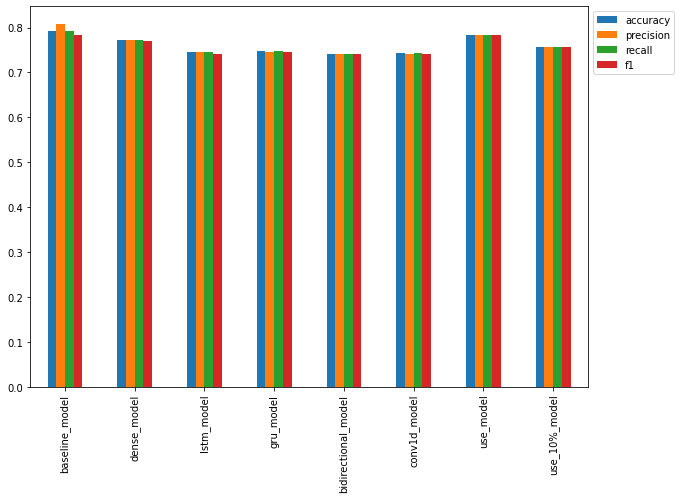

In [131]:
# afisara grafica a rezultatelor
all_model_results.plot(kind="bar", figsize=(10,7)).legend(bbox_to_anchor=(1,1));

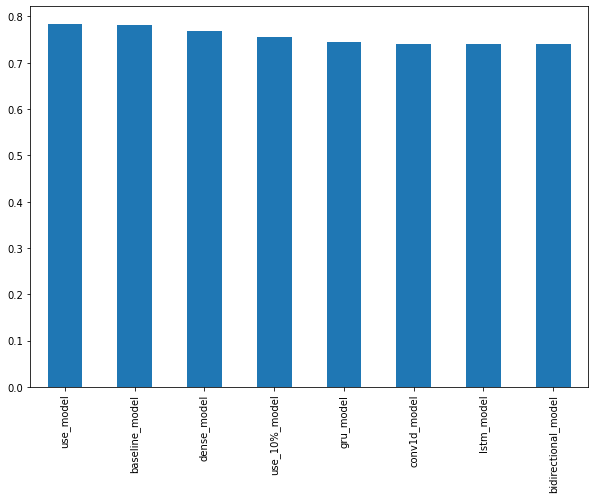

In [132]:
# afisarea doar a marimii f1-score si aranjara in ordine descrescatoare
all_model_results.sort_values("f1", ascending=False)["f1"].plot(kind="bar", figsize=(10,7));

In [133]:
# incarcarea datelor de inregistrare callback Tensorboard in Tensorboard dev
#!tensorboard dev upload --logdir ./model_logs \
# --name "Experimente de modelare NLP"   \
# --description "O se de modele pentru studirea NPL in tensoflow" \
# --one_shot 

# Combinarea modelelor (ensembling/stacking)

Multe sisteme de productie utilizeaza combinarea modelelor necorelate pentru a asigura o predictie mai robusa.

In continuarea se va combina modelul_0 cu modelul_2 si modelul_6 prinmedierea predictiilor fiecaruia

In [134]:
# obtinerea probabilitatilor de predictie a modelului baseline model_0
baseline_pred_probs = np.max(model_0.predict_proba(val_sentences), axis=1)

In [135]:
# Combinarea predictiiilor amodelelelor prin sumarea acestora
combined_pred_probs = baseline_pred_probs+tf.squeeze(model_2_pred_probs, axis=1) +tf.squeeze(model_6_pred_probs, axis=1)

In [136]:
# Medierea si rotungirea preditiilor claselor
combined_preds = tf.round(combined_pred_probs/3)

In [137]:
#Vizualziarea primelor 10 predictii
combined_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 0., 0., 0., 1., 1., 0., 0., 0., 0.], dtype=float32)>

In [138]:
# determinarea rezultatului combinarii modelelor
combined_results = calculate_results(val_label, combined_preds)
combined_results

{'accuracy': 0.7545931758530183,
 'f1': 0.7539959669393321,
 'precision': 0.7537175039341506,
 'recall': 0.7545931758530183}

# Salvarea si incarcarea modelului modelului

Exista doua [modalitati de salvare a modelelor in TensorFLow](https://www.tensorflow.org/tutorials/keras/save_and_load#save_the_entire_model):
1. In format `HDF5`. 
2. In format `SavedModel` (implicit).

In [139]:
# salvarea modelului model_6 in format HDF5
model_6.save("model_6.h5")

Pentru incarcarea modelului salvat in format HDF5 este necesara [informatia despre obiectele personalizate (custom object)](https://www.tensorflow.org/tutorials/keras/save_and_load#saving_custom_objects) atunci cand modelul nu este elaborat doar cu compoente TensorFlow dau utilizeaza si componente TensorFlow Hub

In [140]:
# Incarcarea modelului cu precizarea custom objects
loaded_model_6 = tf.keras.models.load_model("model_6.h5", custom_objects = {"KerasLayer": hub.KerasLayer})

In [141]:
# evaluarea modelului incarcat
loaded_model_6.evaluate(val_sentences, val_label)

24/24 [==============================] - 1s 9ms/step - loss: 0.4544 - accuracy: 0.7835


[0.45443329215049744, 0.7834645509719849]

In [142]:
model_6.evaluate(val_sentences, val_label)

24/24 [==============================] - 0s 9ms/step - loss: 0.4544 - accuracy: 0.7835


[0.45443329215049744, 0.7834645509719849]

In [143]:
# salvarea modelului model_6 in format SavedModel
model_6.save("model_6_SavedModel_format")

INFO:tensorflow:Assets written to: model_6_SavedModel_format/assets


INFO:tensorflow:Assets written to: model_6_SavedModel_format/assets


La incarcarea modelului salvat in format se utilizeaza [functia `load_model()`](https://www.tensorflow.org/tutorials/keras/save_and_load) specificandu-se doar calea catre model nu si custom object.

In [144]:
#incarcarea modelului salvat in format SavedModel
loaded_model_6_SavedModel = tf.keras.models.load_model("model_6_SavedModel_format")

In [145]:
#evaluarea modelelui incarcat
loaded_model_6_SavedModel.evaluate(val_sentences, val_label)

24/24 [==============================] - 1s 8ms/step - loss: 0.4544 - accuracy: 0.7835


[0.45443329215049744, 0.7834645509719849]


> 🤔 **Intrebarea:** In ce format e mai bine de salvat modelul `SavedModel` sau `HDF5`?

Pentru majoritatea cazurilor formatul `SavedModel` este suficient, plus ca acesta este un standard specific TensorFlow. Daca este necesar de un standard cu scop general atunci formatul `HDF5` este mai recomandabil. Pentru mai multe detalii se va consulta [documentatia TensorFlow de salvare si incarcarea a modelelor](https://www.tensorflow.org/tutorials/keras/save_and_load).

# Determinarea celor mai eronate predictii

In [146]:
# creara unui dataframe cu datele de validare si predictii pe aceste cu ajutorul modelului 6
val_df = pd.DataFrame({"text": val_sentences,
                       "target": val_label,
                       "predictie": model_6_preds,
                       "probabilit_predictie": tf.squeeze(model_6_pred_probs)})

In [147]:
# vizualizarea acestui dataframe
val_df

,text,target,predictie,probabilit_predictie
0,An Eau Claire man who police said was drunk wh...,1,1.0,0.980274
1,Ain't no hoe in my blood,1,0.0,0.069284
2,Seven Chinese Christians Are Detained Amid Wid...,1,1.0,0.582411
3,@volcano_tornado live somewhere else for a whi...,1,0.0,0.110633
4,During the 1960s the oryx a symbol of the Arab...,1,1.0,0.537567
...,...,...,...,...
757,Serephina the Siren &lt;3 http://t.co/k6UEtsnLHT,0,1.0,0.548328
758,when things become terrible more than the grea...,0,1.0,0.543846
759,Thunder and lightning possible in the Pinpoint...,1,1.0,0.709092
760,Perspectives on Terrorism - Understanding Jiha...,1,1.0,0.751040


In [148]:
# elaborarea unui dataframe ce va contine doar datele cu prediectie grasita
wrong_val_df = val_df[val_df.target!=val_df.predictie]
wrong_val_df

,text,target,predictie,probabilit_predictie
1,Ain't no hoe in my blood,1,0.0,0.069284
3,@volcano_tornado live somewhere else for a whi...,1,0.0,0.110633
9,burned 129 calories doing 24 minutes of Walkin...,1,0.0,0.083920
11,U.S National Park Services Tonto National Fore...,0,1.0,0.607668
12,Well Saturn doesn't exist anymore. So the coll...,1,0.0,0.484171
...,...,...,...,...
740,@xDescry I was wrong to call it trusty actuall...,1,0.0,0.190527
746,Richard returns after whirlwind few days http:...,1,0.0,0.144966
751,#?x?: :and to counter acts such as the burning...,1,0.0,0.388211
757,Serephina the Siren &lt;3 http://t.co/k6UEtsnLHT,0,1.0,0.548328


In [149]:
#adaugarea unei coloane ce va contine probabilitatea de eroare daca predictia gresita e 1 si 1-probabilitatea daca predictia gresita este 0

wrong_val_df.loc[wrong_val_df.predictie==0, "Eroare"]= 1-wrong_val_df.probabilit_predictie
wrong_val_df.loc[wrong_val_df.predictie!=0, "Eroare"]= wrong_val_df.probabilit_predictie

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [150]:
wrong_val_df

,text,target,predictie,probabilit_predictie,Eroare
1,Ain't no hoe in my blood,1,0.0,0.069284,0.930716
3,@volcano_tornado live somewhere else for a whi...,1,0.0,0.110633,0.889367
9,burned 129 calories doing 24 minutes of Walkin...,1,0.0,0.083920,0.916080
11,U.S National Park Services Tonto National Fore...,0,1.0,0.607668,0.607668
12,Well Saturn doesn't exist anymore. So the coll...,1,0.0,0.484171,0.515828
...,...,...,...,...,...
740,@xDescry I was wrong to call it trusty actuall...,1,0.0,0.190527,0.809473
746,Richard returns after whirlwind few days http:...,1,0.0,0.144966,0.855034
751,#?x?: :and to counter acts such as the burning...,1,0.0,0.388211,0.611789
757,Serephina the Siren &lt;3 http://t.co/k6UEtsnLHT,0,1.0,0.548328,0.548328


In [151]:
# Sortarea dataframeului dupa coloana eroare
most_wrong_val_df = wrong_val_df.sort_values("Eroare", ascending=False)
most_wrong_val_df

,text,target,predictie,probabilit_predictie,Eroare
198,#hot C-130 specially modified to land in a st...,0,1.0,0.979825,0.979825
473,Man Currensy really be talkin that talk... I'd...,1,0.0,0.037782,0.962218
151,Watch These Super Strong Magnets Destroy Every...,1,0.0,0.050171,0.949829
425,the sunset boys wreck my bed original 1979 u...,1,0.0,0.051443,0.948557
63,@writebothfists It got pretty windy here too.....,0,1.0,0.948363,0.948363
...,...,...,...,...,...
12,Well Saturn doesn't exist anymore. So the coll...,1,0.0,0.484171,0.515828
505,Politifiact: Harry Reid's '30 Percent of Women...,0,1.0,0.510636,0.510636
672,FYI CAD:FYI: ;ACCIDENT PROPERTY DAMAGE;NHS;999...,1,0.0,0.490578,0.509422
663,my school just put the evacuation alarms on ac...,0,1.0,0.507348,0.507348


In [152]:
# vizualizarea a 20 cele mai eronate predictii
for row in most_wrong_val_df[:20].itertuples():
  _,text, target, predictie, probabilit_predictie, Eroare = row
  print(f"Target: {target}, Predictie: {predictie}, Probabilitatea de predictie: {probabilit_predictie}, Eroarea: {Eroare*100}%")
  print(f"Testul:\n {text}\n")
  print("----\n")

Target: 0, Predictie: 1.0, Probabilitatea de predictie: 0.9798247814178467, Eroarea: 97.98247814178467%
Testul:
 #hot  C-130 specially modified to land in a stadium and rescue hostages in Iran in 1980 http://t.co/zY3hpdJNwg #prebreak #best

----

Target: 1, Predictie: 0.0, Probabilitatea de predictie: 0.037782371044158936, Eroarea: 96.2217628955841%
Testul:
 Man Currensy really be talkin that talk... I'd be more devastated if he had a ghostwriter than anybody else....

----

Target: 1, Predictie: 0.0, Probabilitatea de predictie: 0.050170838832855225, Eroarea: 94.98291611671448%
Testul:
 Watch These Super Strong Magnets Destroy Everyday Objects: http://t.co/bTUs5jejuy http://t.co/zrTfxLuk6R

----

Target: 1, Predictie: 0.0, Probabilitatea de predictie: 0.051442742347717285, Eroarea: 94.85572576522827%
Testul:
 the sunset boys wreck my bed   original 1979 usa gimp label  vinyl 7' 45  newave http://t.co/X0QLgwoyMT http://t.co/hQNx8qMeG3

----

Target: 0, Predictie: 1.0, Probabilitatea de

# Realizarea predictiei pe diferite date

## Realizarea predictie pe datele de test

In [158]:
# Includera tuturor textelor din setul de test intr-o lista
test_sentences = test_df['text'].to_list()

In [159]:
# selectarea a 10 texte aliatoare
test_samples = random.sample(test_sentences, 10)

In [160]:
# Realizara predictiei si afiisare rezultatelor
for test_sample in test_samples:
  pred_prob = tf.squeeze(model_6.predict([test_sample]))
  pred = tf.round(pred_prob)
  print(f"Predictie: {pred}, Probabilitate: {pred_prob}")
  print(f"Textul:\n{test_sample}\n ----\n")

Predictie: 1.0, Probabilitate: 0.9909529685974121
Textul:
Suicide Bomber Kills 13 At Saudi Mosque: Back in May a suicide bomber struck a Shi'ite mosque in eastern Saud.. http://t.co/FlrOvkANC0
 ----

Predictie: 0.0, Probabilitate: 0.326485812664032
Textul:
I asked my dad 'what if a tornado comes ?'and he said 'well you better stick your head between your legs and kiss your butt goodbye'??
 ----

Predictie: 1.0, Probabilitate: 0.7255202531814575
Textul:
@patrickandsam @ghaccount I've been screaming natural disaster for months but now idk. Maybe a hospital crisis.
 ----

Predictie: 1.0, Probabilitate: 0.6854739189147949
Textul:
#Detroit has made progress against blight but too many burned out shells of houses remain.
 ----

Predictie: 0.0, Probabilitate: 0.25114649534225464
Textul:
Storm &amp; Family tonight http://t.co/0aP7MoNtjF
 ----

Predictie: 0.0, Probabilitate: 0.14392653107643127
Textul:
Throat stretcher http://t.co/vkThHbOQjs
 ----

Predictie: 0.0, Probabilitate: 0.1361700594425

## Realizarea predictiei pe propriile date

In [161]:
# Elaborarea unei functii ce va rea;izare predictia pe propriile date
def predictie_proprie(model, propozitie):
  pred_prob = tf.squeeze(model.predict([propozitie]))
  pred = tf.round(pred_prob)
  print(f"Predictie: {pred}", "(un dezastru)" if pred>0 else "(nu este dezastru)", f"Pobabilitate: {pred_prob}")
  print(f"Textul: \n{propozitie}")

In [164]:
# realizarea predictei 1
propozitie_1 = "It's sunny outside and everything is beautiful"
predictie_proprie(model_6, propozitie_1)

 Predictie: 0.0 (nu este dezastru) Pobabilitate: 0.15781965851783752
Textul: 
It's sunny outside and everything is beautiful


In [165]:
# realizarea predictei 2
propozitie_2 = "It was raining hail outside and the houses were flooded"
predictie_proprie(model_6, propozitie_2)

 Predictie: 1.0 (un dezastru) Pobabilitate: 0.9210958480834961
Textul: 
It was raining hail outside and the houses were flooded


# Compromisul dintre viteza si performanta

In [169]:
# Elaborarea unei funtii de deteminare a timpoului de realizarea a predictiei
import time
def pred_time(model, samples):
  start_time = time.perf_counter()
  model.predict(samples)
  stop_time = time.perf_counter()
  timpul = stop_time-start_time
  timpul_pe_predictie = timpul/len(samples)
  return timpul, timpul_pe_predictie

In [170]:
# Verificarea timpului pentru modelul baseline model_0
timpul_total_model_0_baseline, timpul_per_predictie_model_0_baseline= pred_time(model_0, val_sentences)
timpul_total_model_0_baseline, timpul_per_predictie_model_0_baseline

(0.023689555000146356, 3.108865485583511e-05)

In [171]:
# Verificarea timpului pentru modelul USE model_6
timpul_total_model_6_USE, timpul_per_predictie_model_6_USE= pred_time(model_6, val_sentences)
timpul_total_model_6_USE, timpul_per_predictie_model_6_USE

(0.2295042780001495, 0.0003011867165356293)

In [176]:
# Compararea timpilor de predictie a modelelor model_6 si model_0
raport_model_6_model_0_timp = timpul_per_predictie_model_6_USE/timpul_per_predictie_model_0_baseline
raport_model_6_model_0_timp

9.687994476837224

In [175]:
# Compararea performantelor de predictie f1-score a modelelor model_6 si model_0
raport_model_6_model_0_timp_perform = model_6_results["f1"]/baseline_results["f1"]
raport_model_6_model_0_timp_perform

1.0002985864776892

# 🛠 Exercises

1. Rebuild, compile and train `model_1`, `model_2` and `model_5` using the [Keras Sequential API](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) instead of the Functional API.
2. Retrain the baseline model with 10% of the training data. How does perform compared to the Universal Sentence Encoder model with 10% of the training data?
3. Try fine-tuning the TF Hub Universal Sentence Encoder model by setting `training=True` when instantiating it as a Keras layer.

```
We can use this encoding layer in place of our text_vectorizer and embedding layer

sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[],
                                        dtype=tf.string,
                                        trainable=True) # turn training on to fine-tune the TensorFlow Hub model
```
4. Retrain the best model you've got so far on the whole training set (no validation split). Then use this trained model to make predictions on the test dataset and format the predictions into the same format as the `sample_submission.csv` file from Kaggle (see the Files tab in Colab for what the `sample_submission.csv` file looks like). Once you've done this, [make a submission to the Kaggle competition](https://www.kaggle.com/c/nlp-getting-started/data), how did your model perform?
5. Combine the ensemble predictions using the majority vote (mode), how does this perform compare to averaging the prediction probabilities of each model?
6. Make a confusion matrix with the best performing model's predictions on the validation set and the validation ground truth labels.

# 📖 Extra-curriculum 

To practice what you've learned, a good idea would be to spend an hour on 3 of the following (3-hours total, you could through them all if you want) and then write a blog post about what you've learned.

* For an overview of the different problems within NLP and how to solve them read through: 
 * [A Simple Introduction to Natural Language Processing](https://becominghuman.ai/a-simple-introduction-to-natural-language-processing-ea66a1747b32)
 * [How to solve 90% of NLP problems: a step-by-step guide](https://blog.insightdatascience.com/how-to-solve-90-of-nlp-problems-a-step-by-step-guide-fda605278e4e)
* Go through [MIT's Recurrent Neural Networks lecture](https://youtu.be/SEnXr6v2ifU). This will be one of the greatest additions to what's happening behind the RNN model's you've been building.
* Read through the [word embeddings page on the TensorFlow website](https://www.tensorflow.org/tutorials/text/word_embeddings). Embeddings are such a large part of NLP. We've covered them throughout this notebook but extra practice would be well worth it. A good exercise would be to write out all the code in the guide in a new notebook. 
* For more on RNN's in TensorFlow, read and reproduce [the TensorFlow RNN guide](https://www.tensorflow.org/guide/keras/rnn). We've covered many of the concepts in this guide, but it's worth writing the code again for yourself.
* Text data doesn't always come in a nice package like the data we've downloaded. So if you're after more on preparing different text sources for being with your TensorFlow deep learning models, it's worth checking out the following:
 * [TensorFlow text loading tutorial](https://www.tensorflow.org/tutorials/load_data/text).
  * [Reading text files with Python](https://realpython.com/read-write-files-python/) by Real Python.
* This notebook has focused on writing NLP code. For a mathematically rich overview of how NLP with Deep Learning happens, read [Standford's Natural Language Processing with Deep Learning lecture notes Part 1](https://web.stanford.edu/class/cs224n/readings/cs224n-2019-notes01-wordvecs1.pdf).  
  * For an even deeper dive, you could even do the whole [CS224n](http://web.stanford.edu/class/cs224n/) (Natural Language Processing with Deep Learning) course. 
* Great blog posts to read:
  * Andrei Karpathy's [The Unreasonable Effectiveness of RNNs](https://karpathy.github.io/2015/05/21/rnn-effectiveness/) dives into generating Shakespeare text with RNNs.
  * [Text Classification with NLP: Tf-Idf vs Word2Vec vs BERT](https://towardsdatascience.com/text-classification-with-nlp-tf-idf-vs-word2vec-vs-bert-41ff868d1794) by Mauro Di Pietro. An overview of different techniques for turning text into numbers and then classifying it.
  * [What are word embeddings?](https://machinelearningmastery.com/what-are-word-embeddings/) by Machine Learning Mastery.
* Other topics worth looking into:
  * [Attention mechanisms](https://jalammar.github.io/visualizing-neural-machine-translation-mechanics-of-seq2seq-models-with-attention/). These are a foundational component of the transformer architecture and also often add improvments to deep NLP models.
  * [Transformer architectures](http://jalammar.github.io/illustrated-transformer/). This model architecture has recently taken the NLP world by storm, achieving state of the art on many benchmarks. However, it does take a little more processing to get off the ground, the [HuggingFace Models (formerly HuggingFace Transformers) library](https://huggingface.co/models/) is probably your best quick start.
    * And now [HuggingFace even have their own course](https://huggingface.co/course/chapter1) on how their library works! I haven't done it but anything HuggingFace makes is world-class.

